# Data Understanding & Data Preparation

### Import Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

client = 'TOOL_CLIENT.csv'
sales  = 'TOOL_SALES.csv'
joint = 'TOOL_JOINT.csv'

In [2]:
df_client = pd.read_csv(client)
df_sales = pd.read_csv(sales)

df = pd.merge(df_client, df_sales, on='CLIENT_ID')
df.head()

/tmp/ipykernel_38401/2377162878.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(sales)


,CLIENT_ID,CLIENT_CREATE DATE,REGION,TRADE SECTOR,N_EMPLOYEES,ECONOMIC_POT,ECO_POT_CLASS,RISK_CAT,YYYYMM,ITEM_ID,FLG_TOOL,SALES_CHANNEL,NET,UNIT,FAMILY_CODE,GROUP_CODE,CANCELLED
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [5]:
df.describe()

,client_id,trade_sector,n_employees,economic_pot,yyyymm,item_id,flg_tool,net
count,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06
mean,4.085241e+04,1.680062e+04,5.811620e+00,6.042201e+03,2.018903e+05,6.152528e+03,3.593223e-01,1.168498e+02
std,2.428800e+04,7.528669e+03,3.789158e+01,3.006802e+03,1.428000e+02,4.524401e+03,4.798019e-01,2.273342e+02
min,1.000000e+00,1.000000e+04,1.000000e+00,0.000000e+00,2.017010e+05,1.000000e+00,0.000000e+00,-1.313297e+04
25%,1.997500e+04,1.100000e+04,2.000000e+00,3.047920e+03,2.018010e+05,2.470000e+03,0.000000e+00,1.368000e+01
50%,4.046800e+04,1.350000e+04,3.000000e+00,6.038040e+03,2.019030e+05,4.815000e+03,0.000000e+00,4.909000e+01
75%,5.997900e+04,2.110000e+04,5.000000e+00,8.659810e+03,2.020090e+05,1.007700e+04,1.000000e+00,1.357800e+02
max,9.325700e+04,4.250000e+04,1.000000e+04,2.106921e+04,2.021120e+05,1.458100e+04,1.000000e+00,5.954192e+04


In [3]:
# lower case and replace spaces with underscores in column names
original_columns = df.columns
renamed_columns = [col.lower().replace(" ", "_") for col in original_columns]
column_mapping = dict(zip(original_columns, renamed_columns))
df.rename(columns=column_mapping, inplace=True)

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [ ]:
df.info()

In [6]:
# converting date columns to datetime
df['client_create_date'] = pd.to_datetime(df['client_create_date'])
df['yyyymm'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m')

# converting other columns to appropriate data types
df['client_id'] = df['client_id'].astype(str)
df['cancelled'] = df['cancelled'] == 'X'
df['unit'] = df['unit'] == 'P'

In [ ]:
df.info()

In [7]:
# creating a new column for identifie the unique sales
df['sales_id'] = df['client_id'].astype(str) + '_' + df['yyyymm'].dt.strftime('%Y%m')

In [8]:
# adding new variables to the main dataframe
n_purchases = df.groupby('client_id')['sales_id'].nunique()   # counting unique sales for each client
sales_net = df.groupby('sales_id')['net'].sum()   # summarizing the net sales by sales_id

time_diff = df[['client_id', 'sales_id', 'yyyymm']].drop_duplicates()   # extracting time between purchases
time_diff['time_diff_prec'] = time_diff.groupby('client_id')['yyyymm'].diff().dt.days
time_diff['time_diff_next'] = (time_diff.groupby('client_id')['yyyymm'].shift(-1) - time_diff['yyyymm']).dt.days

# merging the new variables to the main dataframe
df['n_purchases'] = df['client_id'].map(n_purchases)   # adding the number of purchases
df['sales_net'] = df['sales_id'].map(sales_net)   # adding the net sales
df['time_diff_prec'] = df['sales_id'].map(time_diff.set_index('sales_id')['time_diff_prec'])   # adding the time difference
df['time_diff_next'] = df['sales_id'].map(time_diff.set_index('sales_id')['time_diff_next'])

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,...,net,unit,family_code,group_code,cancelled,sales_id,n_purchases,sales_net,time_diff_prec,time_diff_next
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,...,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709,2,1579.03,NaN,1126.0
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,...,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709,2,1579.03,NaN,1126.0
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,...,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709,2,1579.03,NaN,1126.0
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,...,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010,2,1341.14,1126.0,NaN
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,...,64.51,True,XAES4AA,XAES4AA0101,True,939_201705,3,64.51,NaN,31.0


In [9]:
df['unit'].value_counts()

unit
True     2035647
False      14802
Name: count, dtype: int64

In [10]:
df_model = df.copy()   # creating a copy of the main dataframe for modeling

# dropping columns that are not needed for modeling
df_model.drop(df_model[df_model['unit'] == False].index, inplace=True)   # dropping the canceled orders
df_model.drop('unit', axis=1, inplace=True)    # dropping the canceled column
df_model.drop(df_model[df_model['cancelled'] == True].index, inplace=True)   # dropping the canceled orders
df_model.drop('cancelled', axis=1, inplace=True)    # dropping the canceled column

df_model.head(10)

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff_prec,time_diff_next
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN,1126.0
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,NaN,1126.0
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN,1126.0
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0,NaN
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,NaN,30.0
8,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-05-01,8666,0,B,5.96,XAEG4AA,XAEG4AA0101,8321_201805,7,5.96,30.0,457.0
9,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-08-01,8662,0,B,22.26,XAEG4AA,XAEG4AA0101,8321_201908,7,22.26,457.0,122.0
10,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-12-01,12478,1,B,117.65,XAES2AC,XAES2AC0201,8321_201912,7,117.65,122.0,152.0
11,8321,2005-11-15,LE,15500,2,681.26,E,T8,2020-05-01,7187,0,B,10.08,XAEG4AA,XAEG4AA0101,8321_202005,7,10.08,152.0,426.0
12,8321,2005-11-15,LE,15500,2,681.26,E,T8,2021-07-01,6776,0,B,22.74,XBSI4AA,XBSI4AA0101,8321_202107,7,22.74,426.0,123.0


In [11]:
# creating the target variable
df_model['target'] = np.where(df_model['time_diff_next'] > 730, 1, 0)
df_model.head(20)

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,...,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff_prec,time_diff_next,target
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,...,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN,1126.0,1
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,...,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,NaN,1126.0,1
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,...,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN,1126.0,1
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,...,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0,NaN,0
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,...,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,NaN,30.0,0
8,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-05-01,8666,...,B,5.96,XAEG4AA,XAEG4AA0101,8321_201805,7,5.96,30.0,457.0,0
9,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-08-01,8662,...,B,22.26,XAEG4AA,XAEG4AA0101,8321_201908,7,22.26,457.0,122.0,0
10,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-12-01,12478,...,B,117.65,XAES2AC,XAES2AC0201,8321_201912,7,117.65,122.0,152.0,0
11,8321,2005-11-15,LE,15500,2,681.26,E,T8,2020-05-01,7187,...,B,10.08,XAEG4AA,XAEG4AA0101,8321_202005,7,10.08,152.0,426.0,0
12,8321,2005-11-15,LE,15500,2,681.26,E,T8,2021-07-01,6776,...,B,22.74,XBSI4AA,XBSI4AA0101,8321_202107,7,22.74,426.0,123.0,0


In [12]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1933899 entries, 0 to 2050448
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  family_code         object        
 14  group_code          object        
 15  sales_id            object        
 16  n_purchases         int64         
 17  sales_net           float64       
 18  time_diff_prec      float64       
 19  time_diff_next      float64       
 20  target 

In [13]:
df_model.drop(df_model[df_model['time_diff_next'] <= 730].index, inplace=True)  # dropping the sales with less than 2 years between them
df_model.head(20)

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,...,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff_prec,time_diff_next,target
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,...,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN,1126.0,1
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,...,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,NaN,1126.0,1
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,...,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,NaN,1126.0,1
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,...,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0,NaN,0
13,8321,2005-11-15,LE,15500,2,681.26,E,T8,2021-11-01,1657,...,B,190.15,XAEG1AA,XAEG1AA0103,8321_202111,7,190.15,123.0,NaN,0
14,4174,2005-11-15,BZ,15400,1,494.45,E,3d,2017-05-01,2097,...,C,592.41,XAMM1AC,XAMM1AC0202,4174_201705,1,592.41,NaN,NaN,0
16,12765,2005-11-15,BZ,15400,1,494.45,E,3b,2018-08-01,211,...,B,64.30,XBSI2BB,XBSI2BB0201,12765_201808,4,64.30,365.0,792.0,1
19,12765,2005-11-15,BZ,15400,1,494.45,E,3b,2021-06-01,211,...,B,73.82,XBSI2BB,XBSI2BB0201,12765_202106,4,156.06,243.0,NaN,0
20,12765,2005-11-15,BZ,15400,1,494.45,E,3b,2021-06-01,212,...,B,82.24,XBSI2BB,XBSI2BB0201,12765_202106,4,156.06,243.0,NaN,0
21,10364,2005-11-15,BO,22000,4,9056.92,D,3d,2019-12-01,3351,...,B,210.73,XAEP3CC,XAEP3CC0204,10364_201912,1,617.37,NaN,NaN,0


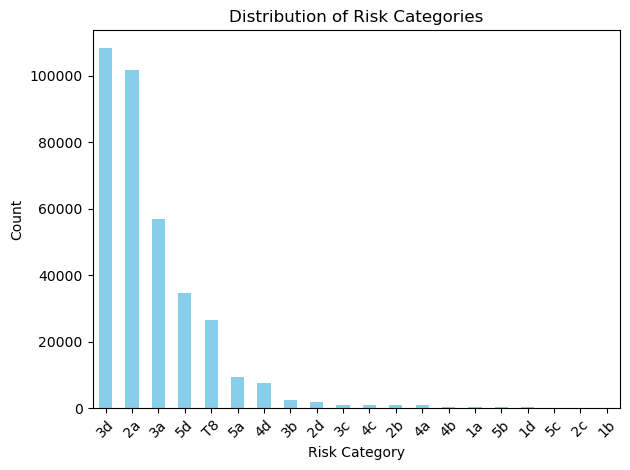

In [15]:
# Count the occurrences of each category in 'risk_cat'
df_model['risk_cat'].value_counts().plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.title('Distribution of Risk Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


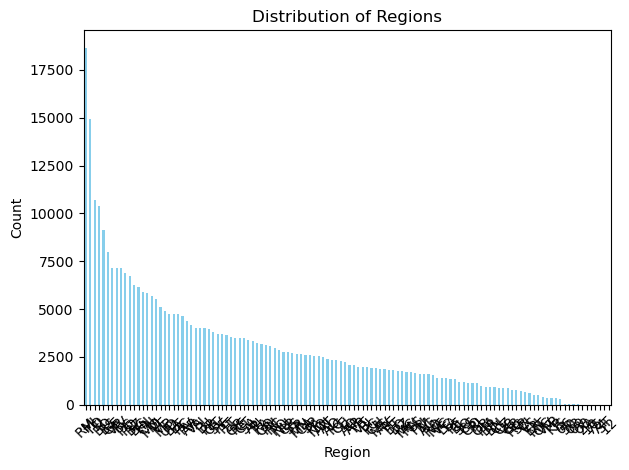

In [16]:
# Count the occurrences of each category in 'risk_cat'
df_model['region'].value_counts().plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_model.to_csv('DF_Model.csv', index=False)   # saving the model dataframe to a csv file